In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from itertools import combinations

In [2]:
boston = pd.read_csv("Datasets\Boston.csv")

In [6]:
# a
boston = boston.drop("Unnamed: 0", axis=1)
boston = boston.dropna()
# create a binary variable mpg01 that contains a 1 if mpg contains a "high" value and a 0 if mpg contains a "low" value
median_crime = boston["crim"].median()
boston["crim01"] = boston["crim"].map(lambda x: 1 if x > median_crime else 0)
print(boston["crim01"].to_numpy())


[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 

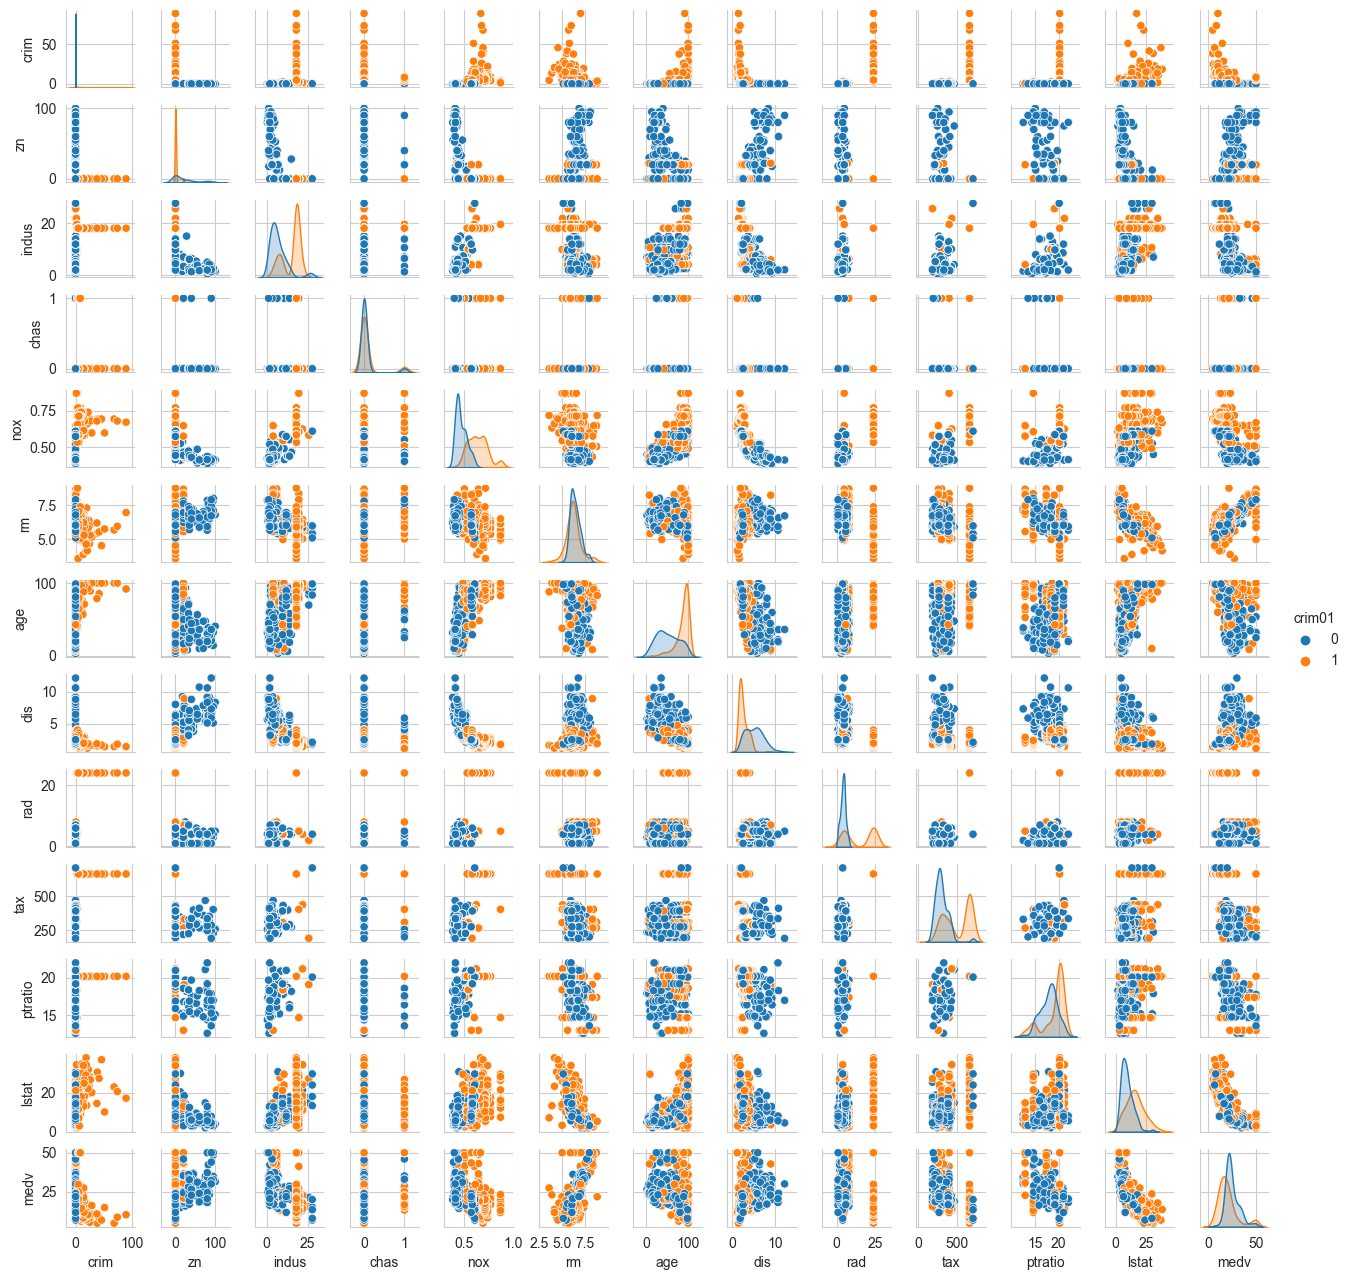

In [7]:
# b 
# create a scatterplot matrix which compares each variable to mpg01
sns.set_style("whitegrid")
sns.pairplot(boston, height=1, hue="crim01")
plt.show()

In [19]:
# c
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X = boston[['zn', 'indus', 'nox', 'rad', 'dis']]
y = boston["crim01"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [20]:
# d
# fit LDA to the training set and compute the test error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("LDA test error : ", (y_test != y_pred).sum() / len(y_test))

LDA test error :  0.15019762845849802


In [21]:
# e
# fit QDA to the training set and compute the test error
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("QDA test error : ", (y_test != y_pred).sum() / len(y_test))

QDA test error :  0.15019762845849802


In [23]:
# f
# fit logistic regression to the training set and compute the test error
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression test error : ", (y_test != y_pred).sum() / len(y_test))

Logistic Regression test error :  0.19367588932806323


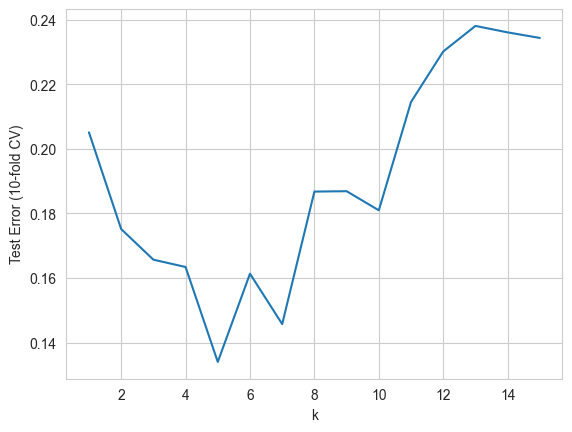

In [25]:
# use cross validation to find the best k value
from sklearn.model_selection import cross_val_score
test_error = []
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=i)
    test_error.append(1 - cross_val_score(model, X, y, cv=10).mean())
plt.plot(range(1, 16), test_error)
plt.xlabel("k")
plt.ylabel("Test Error (10-fold CV)")
plt.show()

LDA test error :  0.15019762845849802
QDA test error :  0.18972332015810275
Logistic Regression test error :  0.1976284584980237


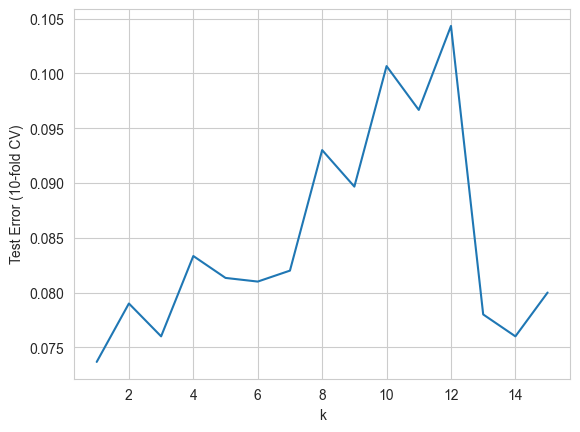

In [28]:
# c
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X = boston[['zn', 'nox', 'rad', 'dis']]
y = boston["crim01"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# d
# fit LDA to the training set and compute the test error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("LDA test error : ", (y_test != y_pred).sum() / len(y_test))

# e
# fit QDA to the training set and compute the test error
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("QDA test error : ", (y_test != y_pred).sum() / len(y_test))

# f
# fit logistic regression to the training set and compute the test error
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression test error : ", (y_test != y_pred).sum() / len(y_test))

# use cross validation to find the best k value
from sklearn.model_selection import cross_val_score
test_error = []
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=i)
    test_error.append(1 - cross_val_score(model, X, y, cv=100).mean())
plt.plot(range(1, 16), test_error)
plt.xlabel("k")
plt.ylabel("Test Error (10-fold CV)")
plt.show()